In [91]:
from qiskit.quantum_info import Statevector
import numpy as np
import math

from qiskit import *
from qiskit.visualization import *

PI = np.pi


NOT with input 0 gives output ['1']


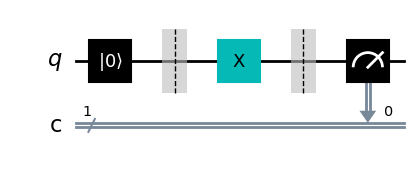

1 

NOT with input 1 gives output ['0']


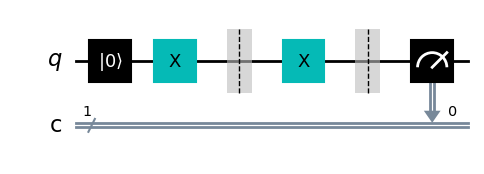

0 



In [14]:
'''Code taken from the Qiskit Textbook'''
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0) #zeroeth qubit
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0] (store in memory)
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    
    output = job.result().get_memory()   
    return qc, output

for inp in ['0','1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw('mpl'))
    print(out[0],'\n')
    

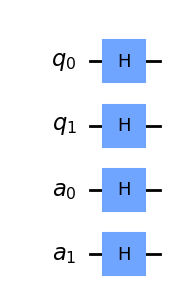

In [89]:
#a different way of creating a quantum circuit

qr = QuantumRegister(2,'q')
qr2 = QuantumRegister(2,'a')

qc = QuantumCircuit(qr,qr2)

qc.h(range(4))

qc.draw('mpl')

In [73]:
def simulator(circuit_):
    backend = Aer.get_backend('aer_simulator')

#     circuit_ = assemble(circuit_)
    
    job = backend.run(circuit_,shots=1,memory=True)
#     print(job.result)
    output = job.result().get_memory()
#     state_vec = job.result().get_statevector(circuit_)
    return output[0]


NAND with inputs 0 0 gives output 1


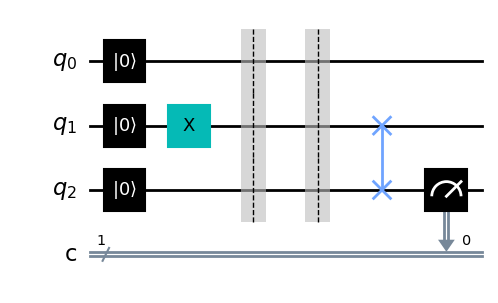



NAND with inputs 0 1 gives output 1


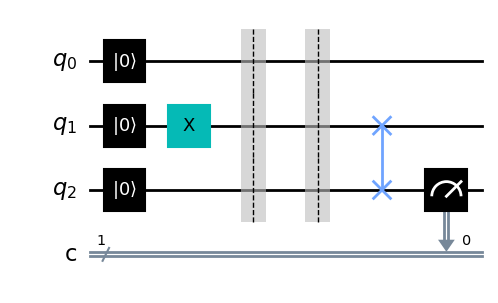



NAND with inputs 1 0 gives output 1


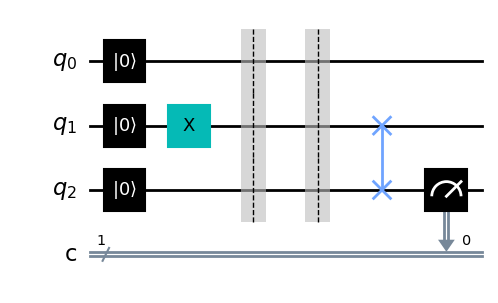



NAND with inputs 1 1 gives output 0


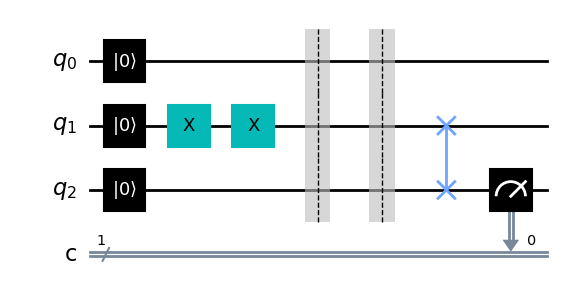

In [50]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    lst = ('00','01','10','11')
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))

    """if (1,1) then the output should be 0, hence first apply x (not) gate to the qubit 1 (which is currently at 0) and this turns it into 1
       then re apply x gate to qubit 1 (which is now 1) , lending us 0."""
    
    if (inp1,inp2) == ('1','1'):
        qc.x(1)
        qc.x(1)
        
    else:

        
        qc.x(1) #applying x gate on the first qubit
        
    qc.barrier()

    qc.barrier()
    
    qc.swap(1,2) #swap qubit 1 and 2 (q1 and q2), and then measure.
    
    qc.measure(2, 0) # output from qubit 1 is measured
    
    out = simulator(qc)[0]

    return qc, out

for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

The given bell state is:  0


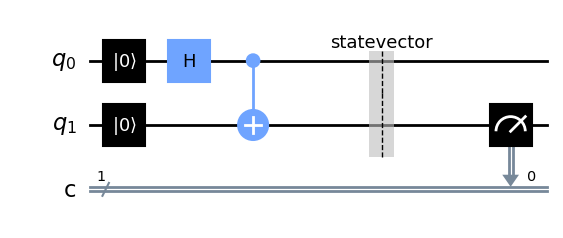

In [74]:
qc = QuantumCircuit(2,1)

qc.reset(range(2))

qc.h(0)

qc.cx(0,1)

qc.save_statevector()

qc.measure(1,0)

out= simulator(qc)

print("The given bell state is: ",out)

# array_to_latex(state_vec,prefix='\\{State Vector=}')

qc.draw('mpl')


00


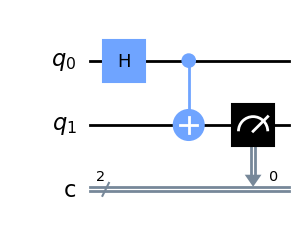

<IPython.core.display.Latex object>

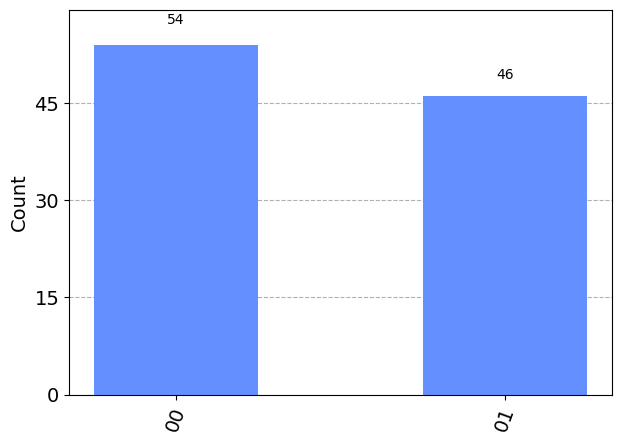

In [118]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cnot(0,1)
s1 = Statevector(qc)


qc.measure(1,0)


simulator = Aer.get_backend('aer_simulator')
out = simulator.run(transpile(qc,simulator),shots=100,memory=True,statevector=True).result()
print(out.get_memory()[0])

counts = out.get_counts()

display(qc.draw('mpl'))

display(s1.draw(output='latex'))

plot_histogram(counts)


0 : [1, 0, 0]
1 : [1, 3.141592653589793, 0]
+ : [1, 1.5707963267948968, 1.1102230246251565e-16]


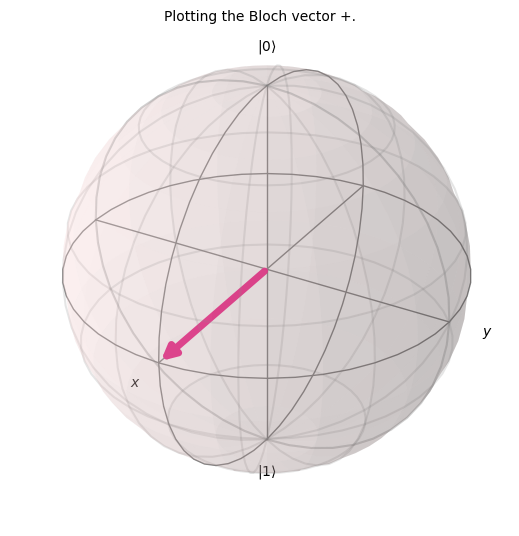

In [50]:

def get_spherical_coords(qubit:list):
    
    """
    params:
    qubit: array / list form , eg : [1,0]
    
    theta = angle b/w x and x axis (x is the projection of r onto the x axis.)
    phi = angle b/w r and z axis 
    """
    
    r = 1
    theta = 2*math.acos(qubit[0]) #cos(theta/2) = qubit[0]
    sin_theta_by_2 = math.sin(theta/2)
    
    phi = complex(0,-1*math.log(qubit[1]/(sin_theta_by_2))) #(1/i = i/(-1))
    phi = phi.imag
    
    return r,theta,phi

spherical_coords = {'0':[1,0,0],'1':[1,np.pi,0]}

q_0 = np.array([1,0])
q_1 = np.array([0,1])

q_plus = (q_0 + q_1)/math.sqrt(2)
q_neg = (q_0 - q_1)/math.sqrt(2)

q_plus_spherical = list(get_spherical_coords(q_plus))
# print(q_plus_spherical)

spherical_coords['+'] = q_plus_spherical
# spherical_coords['-'] = list(get_spherical_coords(q_neg))

for i,j in spherical_coords.items():
    
    print(i,":",j)

plot_bloch_vector(spherical_coords['+'],coord_type='spherical',title=f'Plotting the Bloch vector +.')
    



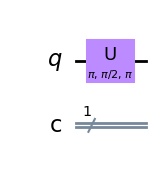

<IPython.core.display.Latex object>

In [96]:
circuit = QuantumCircuit(1,1)

# circuit.x(0)

#a different way to implement hadamard gate (using U3 gate) : 
#ref: https://quantumcomputinguk.org/tutorials/introduction-to-the-u3-gate-with-code

# circuit.u((PI)/2,0,PI,0)

# gate:
circuit.u(PI,PI/2,PI,qubit=0)

sim = Aer.get_backend('statevector_simulator')
out = sim.run(circuit,shots=1).result()
final_state = out.get_statevector()

display(circuit.draw('mpl'))

display(array_to_latex(final_state,prefix='{Final State = }'))

"""U gate is a 3 variable function which outputs a matrix that can emulate any rotation of states through the Bloch Sphere, and thus we 
    can implement the quantum gates by providing appropriate arguments (3 angles).
"""


<IPython.core.display.Latex object>

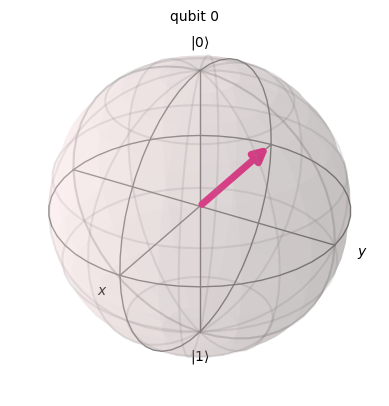

'\n\nPauli X, Y and Z gates:\nx : 0 to 1 , 1 to 0\ny : +i to -i\nz : + to -, - to + & 0 to 0 (unchanged) & 1 to -1.\n\n'

In [115]:
qc = QuantumCircuit(1,1)
initial = [1/math.sqrt(2),1/math.sqrt(2)]
qc.initialize(initial,0)

qc.draw('mpl')

svsim = Aer.get_backend('statevector_simulator')

state = svsim.run(qc,shots=1).result().get_statevector()

# plot_bloch_multivector(state)

# qc.z(0)

# state = svsim.run(qc,shots=1).result().get_statevector()

# plot_bloch_multivector(state)

# qc.y(0)

# state = svsim.run(qc,shots=1).result().get_statevector()

# plot_bloch_multivector(state)

# qc.s(0) # i state

# state = svsim.run(qc,shots=1).result().get_statevector()

# display(array_to_latex(state))

# plot_bloch_multivector(state)

qc.z(0)
state = svsim.run(qc,shots=1).result().get_statevector()

#Either use .run or the execute function (that is available globally).

display(array_to_latex(state))

display(plot_bloch_multivector(state))

"""

Pauli X, Y and Z gates:
x : 0 to 1 , 1 to 0
y : +i to -i
z : + to -, - to + & 0 to 0 (unchanged) & 1 to -1.

"""

In [125]:
#getting the matrix representation 

qc = QuantumCircuit(1,1)
qc.h(0)

sim = Aer.get_backend('unitary_simulator')
res = execute(qc,backend=sim,shots=10).result()

mat = res.get_unitary()
# print(mat)

display(array_to_latex(mat)) #only for matrix upto 2 dimensions.

<IPython.core.display.Latex object>